# Load MNIST Data

In [1]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
tf.__version__

'2.4.1'

In [3]:
mnist_data = tf.keras.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist_data.load_data()

print('Shape of data')
print(f'Training set: {training_images.shape}')
print(f'Testing set: {testing_images.shape}')

11493376/11490434 [==============================] - 0s 0us/step
Shape of data
Training set: (60000, 28, 28)
Testing set: (10000, 28, 28)


In [4]:
training_images = training_images/255.0
testing_images = testing_images/255.0

In the training data, we have collection of 60,000 images. Each image is 28X28 pixel represented in the form of an array. Pixel intensity ranges from 0 to 255. We need to normalize the data by simply dividing each element of the array by 255, so that all the values of the array gets scaled between 0 to 1.

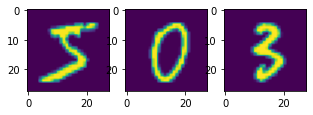

In [5]:
# Plotting sample images of hand written characters using plt.imshow()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5, 5))
ax1.imshow(training_images[0]);
ax2.imshow(training_images[1000]);
ax3.imshow(training_images[45000]);

# Building Neural Network

## Model 1

In [6]:
from tensorflow.nn import softmax
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [7]:
feature_layer = Flatten(input_shape=(28, 28))  # Flatten will convert a 2D image to 1D image so that we asign it to 1 row of neurons

# Creating Sequential Model
model = Sequential([
                    feature_layer,  # Input layer 
                    Dense(128, activation = 'relu'),  # 1st hidden layer 
                    Dense(10, activation = softmax)  # Output layer
                    ])

# Compiling the Model
model.compile(
              optimizer = Adam(), 
              loss = SparseCategoricalCrossentropy(), 
              metrics = [SparseCategoricalAccuracy()]
              )

# Fitting the Model
model.fit(training_images, training_labels, validation_data=(testing_images, testing_labels), epochs=25, verbose=0);

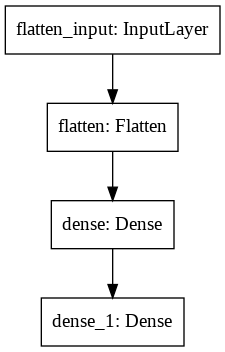

In [8]:
plot_model(model)

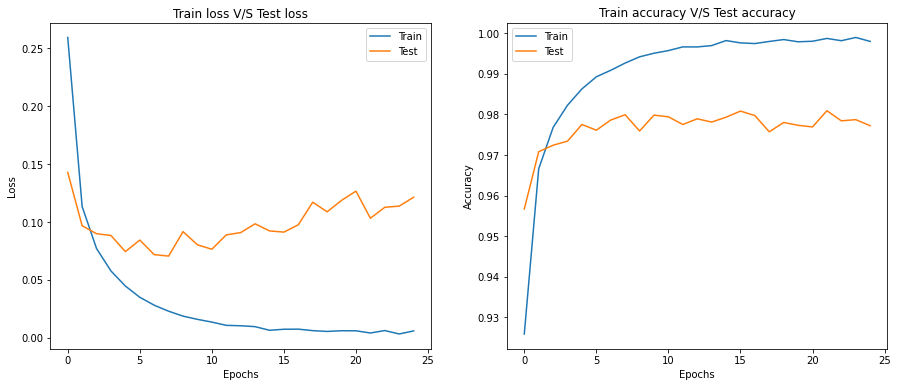

In [9]:
model_history = pd.DataFrame(model.history.history)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(model_history[['loss', 'val_loss']]);
ax1.title.set_text('Train loss V/S Test loss')
ax1.set_xlabel('Epochs');
ax1.set_ylabel('Loss');
ax1.legend('best', labels=['Train', 'Test']);

ax2.plot(model_history[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']]);
ax2.title.set_text('Train accuracy V/S Test accuracy')
ax2.set_xlabel('Epochs');
ax2.set_ylabel('Accuracy');
ax2.legend('best', labels=['Train', 'Test']);

#### Predictions

In [10]:
prediction = model.predict(testing_images)

def predict_handwritten_char(index):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
  x, y = np.arange(0, 10), prediction[index]

  ax1.imshow(testing_images[index]);
  ax2.bar(x, y);

  ax2.set_xticks(x);
  ax2.set_ylabel('Probability Score');
  ax2.set_xlabel('Hand Written Characters');

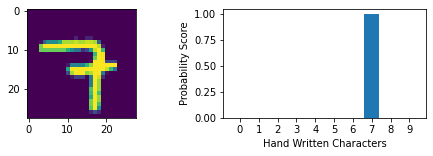

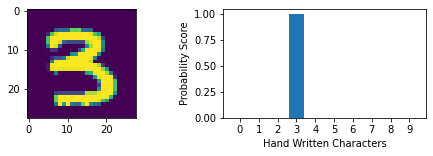

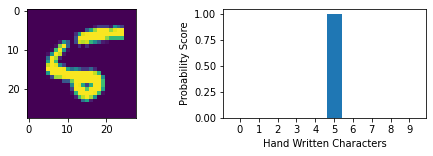

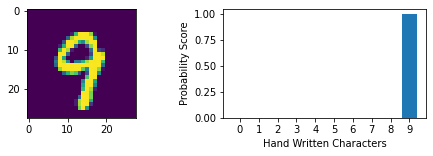

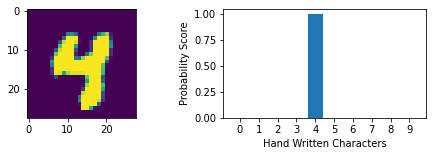

In [11]:
index = [522, 648, 8, 8796, 48]

for i in index:
  predict_handwritten_char(i)

## Model 2

In [12]:
feature_layer = Flatten(input_shape=(28, 28))

# Creating Sequential Model
model = Sequential([
                    feature_layer,  # Input layer 
                    Dense(128, activation = 'relu'),  # 1st hidden layer 
                    Dropout(.40),  # Dropout
                    Dense(64, activation = 'relu'),  # 2nd hidden layer  
                    Dropout(.40),  # Dropout
                    Dense(32, activation = 'relu'),  # 3rd hidden layer
                    Dense(10, activation = softmax)  # Output layer
                    ])

# Compiling the Model
model.compile(
              optimizer = Adam(), 
              loss = SparseCategoricalCrossentropy(), 
              metrics = [SparseCategoricalAccuracy()]
              )

# Fitting the Model
model.fit(training_images, training_labels, validation_data=(testing_images, testing_labels), epochs=25, verbose=0);

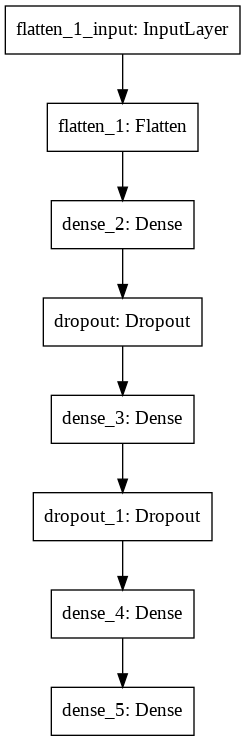

In [13]:
plot_model(model)

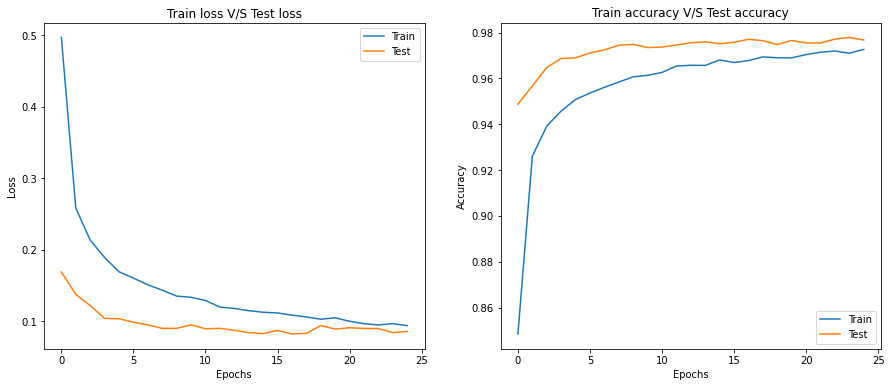

In [14]:
model_history = pd.DataFrame(model.history.history)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(model_history[['loss', 'val_loss']]);
ax1.title.set_text('Train loss V/S Test loss')
ax1.set_xlabel('Epochs');
ax1.set_ylabel('Loss');
ax1.legend('best', labels=['Train', 'Test']);

ax2.plot(model_history[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']]);
ax2.title.set_text('Train accuracy V/S Test accuracy')
ax2.set_xlabel('Epochs');
ax2.set_ylabel('Accuracy');
ax2.legend('best', labels=['Train', 'Test']);

#### Predictions

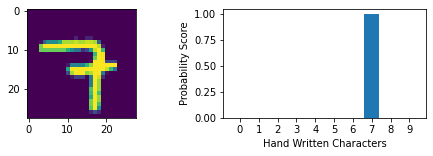

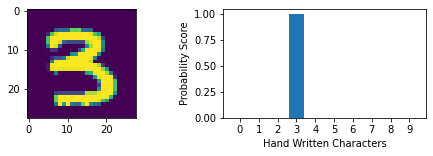

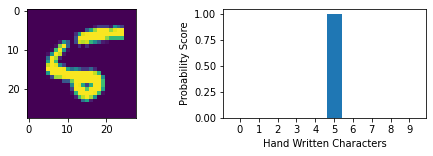

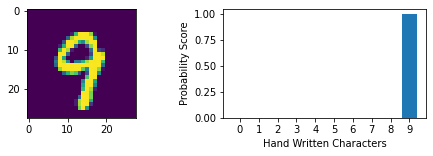

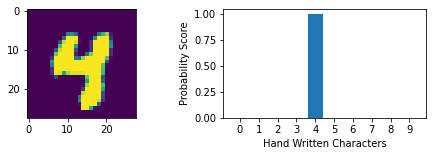

In [15]:
# Randomly predicting 5 hand written characters

index = [522, 648, 8, 8796, 48]

for i in index:
  predict_handwritten_char(i)